<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Qiskit_based_electronic_bandstructure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook shows a few examples to use [JARVIS-Tools](https://github.com/usnistgov/jarvis) and [Qiskit](https://qiskit.org/) packages to generate electronic bandstructure for [Aluminum](https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-816.xml). 
#For details see: https://iopscience.iop.org/article/10.1088/1361-648X/ac1154/meta

Note: We are pinning versions some of the packages as qiskit might have renamed/modified its modules

In [1]:
!pip  install jarvis-tools==2021.7.10 qiskit-terra==0.18.0 qiskit-aer==0.8.2 numpy==1.19.5 matplotlib==3.2.2 requests==2.23.0 scipy==1.4.1 joblib==1.0.1 tqdm==4.41.1 toolz==0.11.1 xmltodict==0.12.0 qiskit-terra==0.18.0 qiskit-aer==0.8.2 qiskit-ibmq-provider==0.15.0 qiskit-ignis==0.6.0 qiskit-aqua==0.9.4


     |████████████████████████████████| 937 kB 14.3 MB/s 
     |████████████████████████████████| 6.1 MB 39.5 MB/s 
     |████████████████████████████████| 18.0 MB 10.2 MB/s 
     |████████████████████████████████| 303 kB 42.3 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 234 kB 65.0 MB/s 
     |████████████████████████████████| 207 kB 65.0 MB/s 
     |████████████████████████████████| 2.1 MB 38.9 MB/s 
     |████████████████████████████████| 292 kB 54.0 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 943 kB 44.4 MB/s 
     |████████████████████████████████| 1.6 MB 46.4 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 211 kB 64.4 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 634 kB 48.1 MB/s 
     |███████████████

In [2]:
from jarvis.db.figshare import get_wann_electron, get_wann_phonon, get_hk_tb
from jarvis.io.qiskit.inputs import HermitianSolver
from jarvis.core.circuits import QuantumCircuitLibrary
from qiskit import Aer

backend = Aer.get_backend("statevector_simulator")
# Aluminum JARVIS-ID: JVASP-816
wtbh, Ef, atoms = get_wann_electron("JVASP-816")
kpt = [0.5, 0., 0.5] # X-point
hk = get_hk_tb(w=wtbh, k=kpt)
HS = HermitianSolver(hk)
n_qubits = HS.n_qubits()
circ = QuantumCircuitLibrary(n_qubits=n_qubits).circuit6()
en, vqe_result, vqe = HS.run_vqe(var_form=circ, backend=backend)
vals,vecs = HS.run_numpy()
# Ef: Fermi-level
print('Classical, VQE (eV):', vals[0]-Ef, en-Ef)
print('Show model\n', circ)

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Obtaining raw io files 145k...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 6.00M/6.00M [00:00<00:00, 7.58MiB/s]


Loading the zipfile...
Loading completed.
H size 15 13 15 8 8


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/operators/legacy/op_converter.py:90: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  num_processes=aqua_globals.num_processes)
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/vq_algorithm.py:72: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algori

Classical, VQE (eV): -3.04371678528499 -3.0437045262005213
Show model
      ┌──────────┐┌──────────┐          ┌──────────┐┌──────────┐             
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├──■────■──┤ Ry(θ[6]) ├┤ Rz(θ[9]) ├─────────────
     ├──────────┤├──────────┤┌─┴─┐  │  └──────────┘├──────────┤┌───────────┐
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├┤ X ├──┼───────■──────┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├
     ├──────────┤├──────────┤└───┘┌─┴─┐   ┌─┴─┐    ├──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─────┤ X ├───┤ X ├────┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├
     └──────────┘└──────────┘     └───┘   └───┘    └──────────┘└───────────┘


In [3]:
from jarvis.io.qiskit.inputs import get_bandstruct


# It's going to be very crude bandstructure, just for learning purposes
# Increase line_density and number of reps in qircuit model to get better quality plot

kpts 24
kp= 0 [0.0, 0.0, 0.0]
np_vals [-3.24066445 -3.16463202 21.64459304 21.66631242 21.68275108 21.7124318
 21.73906807 21.75494905]
vqe_vals [-3.24066415 -3.16418024 21.60902306 21.64481416 21.66984093 21.70757589
 21.73363686 21.75360175]
kp= 1 [0.25, 1.7967564939297314e-17, 0.25]
np_vals [-0.99045319 -0.91496282 16.11225158 16.12899456 16.16829145 16.18771485
 16.87352861 16.95579697]
vqe_vals [-0.99045075 -0.91496185 16.11239662 16.12893811 16.17062764 16.18627898
 16.80586157 16.82563106]
kp= 2 [0.5, 3.593512987859463e-17, 0.5]
np_vals [ 4.88519509  4.95713807  6.16090983  6.24112862 13.26135091 13.27946273
 13.33681169 13.35498806]
vqe_vals [ 4.88521836  4.9572906   6.16091002  6.24112888 13.25391229 13.27732098
 13.3303695  13.35486821]
kp= 3 [0.5, 3.593512987859463e-17, 0.5]
np_vals [ 4.88519509  4.95713807  6.16090983  6.24112862 13.26135091 13.27946273
 13.33681169 13.35498806]
vqe_vals [ 4.88521143  4.95715583  6.20099252  6.20107439 13.2582035  13.27445244
 13.3206335  1

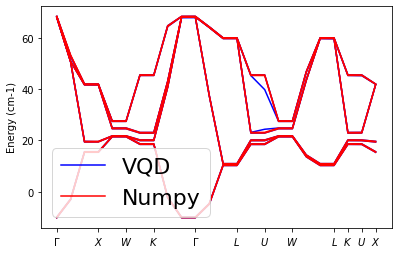

{'ef': 0,
 'eigvals_np': [[-10.175686370472006,
   -9.93694454887241,
   67.9640221443147,
   68.03222100770172,
   68.0838384002764,
   68.17703586217682,
   68.26067374533606,
   68.31054001953848],
  [-3.110023027374121,
   -2.872983261326931,
   50.592469945859676,
   50.64504292986912,
   50.76843514202979,
   50.82942462611683,
   52.98287984025771,
   53.24120248456805],
  [15.33951259740513,
   15.565413544441732,
   19.345256864373383,
   19.597143858621227,
   41.64064184898809,
   41.69751297638366,
   41.87758870651629,
   41.93466250327049],
  [15.33951259740513,
   15.565413544441732,
   19.345256864373383,
   19.597143858621227,
   41.64064184898809,
   41.69751297638366,
   41.87758870651629,
   41.93466250327049],
  [21.384033390854203,
   21.5199112978246,
   21.608868090806485,
   21.745684793149977,
   24.520054335879568,
   24.804659017099063,
   27.382108258691996,
   27.5855023156942],
  [21.384033390854203,
   21.5199112978246,
   21.608868090806485,
   21.74568

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
get_bandstruct(w=wtbh,atoms=atoms, savefig=False)
# Scroll down to see th plot